In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/train_new.csv", index_col=0)
test = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/test_new.csv", index_col=0)

In [4]:
train0 = train[train["is_claim"] == 0].sample(1000, random_state=42)
train1 = train[train["is_claim"] == 1].sample(500, random_state=42)
train_new = pd.concat([train0, train1], ignore_index=False)
train_new = train_new.sample(frac=1, random_state=42, ignore_index=False)

In [5]:
x_train = train_new.drop(["is_claim"], axis="columns")
y_train = train_new["is_claim"]

In [6]:
def initialize_weights_and_bias(num_of_feature):
    W = np.full((1, num_of_feature),0.01)
    b = 0.0
    return W,b

def sigmoid(z):
  z = z.astype(float)
  y_head = 1 / (1+np.exp(np.array(-z)))
  return y_head

def square_loss(y_pred, target):
  return np.mean(pow((y_pred-target),2))

In [7]:
def forward_backward_propagation(W, b, x_train, y_train):
    y = np.dot(W, x_train.T) + b
    y_head = sigmoid(y)
    loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
    cost = (np.sum(loss)) / (-x_train.shape[0])

    #Backward Propogation
    derivative_weight = (np.dot((y_head[0]-y_train),(x_train)))/x_train.shape[0]
    derivative_bias = np.sum(y_head[0]-y_train)/x_train.shape[0]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [8]:
def train(W, b, x_train, y_train, learning_rate, num_of_iterarion):
    cost_list = []
    index = []
    for i in range(num_of_iterarion):
        cost, gradients = forward_backward_propagation(W, b, x_train, y_train)
        cost_list.append(cost)
        index.append(i)
        W = W - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"Weight": W,"Bias": b}
    plt.plot(index,cost_list)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [9]:
def predict(W, b, x_test):
    y = sigmoid(np.dot(W, x_test.T)+b)
    y_pred = np.zeros((1, x_test.shape[0]))

    for i in range(y.shape[0]):
        if y[0,i]< 0.5:
            y_pred[0,i] = 0
        else:
            y_pred[0,i] = 1

    return y_pred

In [10]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate , num_iterations):
    dimension = x_train.shape[0]
    num_of_feature =  x_train.shape[1]

    W,b = initialize_weights_and_bias(num_of_feature)

    parameters, gradients, cost_list = train(W, b, x_train, y_train, learning_rate, num_iterations)

    y_pred_test = predict(parameters["Weight"], parameters["Bias"], x_test)

    accuracy = 0
    for i in range(y_test.shape[0]):
      if y_test[i] == y_pred_test[0][i]:
        accuracy = accuracy + 1
    accuracy = (accuracy/y_test.shape[0])*100

    print("Test Accuracy = ",accuracy, "%")

Train data [ 500  501  502  503  504  505  506  507  508  509  510  511  512  513
  514  515  516  517  518  519  520  521  522  523  524  525  526  527
  528  529  530  531  532  533  534  535  536  537  538  539  540  541
  542  543  544  545  546  547  548  549  550  551  552  553  554  555
  556  557  558  559  560  561  562  563  564  565  566  567  568  569
  570  571  572  573  574  575  576  577  578  579  580  581  582  583
  584  585  586  587  588  589  590  591  592  593  594  595  596  597
  598  599  600  601  602  603  604  605  606  607  608  609  610  611
  612  613  614  615  616  617  618  619  620  621  622  623  624  625
  626  627  628  629  630  631  632  633  634  635  636  637  638  639
  640  641  642  643  644  645  646  647  648  649  650  651  652  653
  654  655  656  657  658  659  660  661  662  663  664  665  666  667
  668  669  670  671  672  673  674  675  676  677  678  679  680  681
  682  683  684  685  686  687  688  689  690  691  692  693  694 

<ipython-input-7-76da56fcdda1>:4: RuntimeWarning: divide by zero encountered in log
  loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
<ipython-input-6-0e2e218f5c28>:8: RuntimeWarning: overflow encountered in exp
  y_head = 1 / (1+np.exp(np.array(-z)))


Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


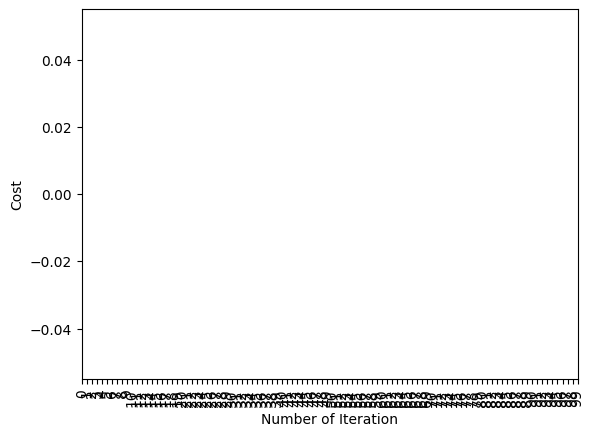

Test Accuracy =  65.0 %
Train data [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  

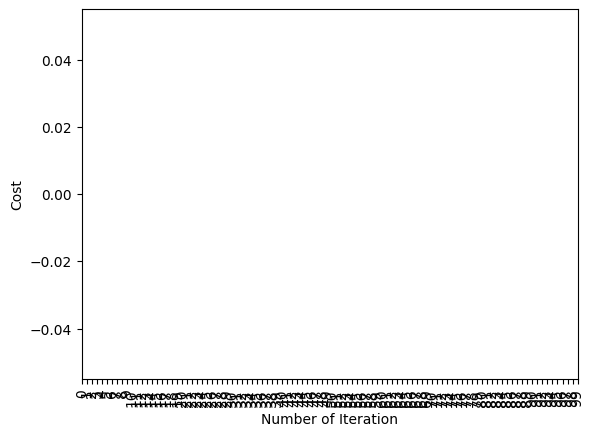

Test Accuracy =  70.19999999999999 %
Train data [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 23

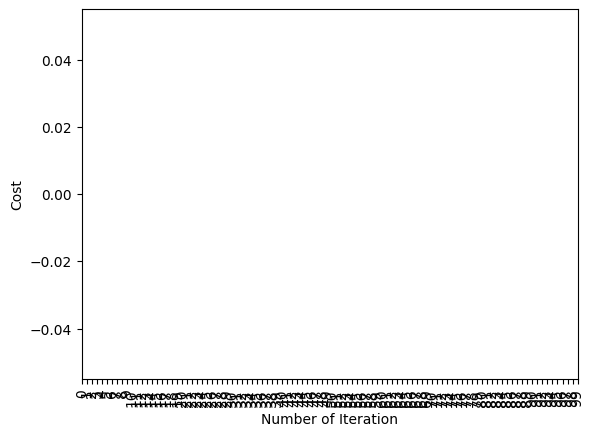

Test Accuracy =  64.8 %


In [11]:
k1 = 3
CV1 = KFold(n_splits=k1, shuffle=False, random_state=None)
for train_index, valid_index in CV1.split(x_train):
  print("Train data", train_index,"Valid data", valid_index)
  x_CV1_train, x_CV1_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  y_CV1_train, y_CV1_valid = y_train[train_index], y_train[valid_index]
  logistic_regression(x_CV1_train, y_CV1_train, x_CV1_valid, y_CV1_valid,learning_rate = 0.001, num_iterations = 100)

65.0 %  

70.19999999999999 %

64.8 %

Cost after iteration 0: inf


<ipython-input-7-76da56fcdda1>:4: RuntimeWarning: divide by zero encountered in log
  loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
<ipython-input-6-0e2e218f5c28>:8: RuntimeWarning: overflow encountered in exp
  y_head = 1 / (1+np.exp(np.array(-z)))


Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


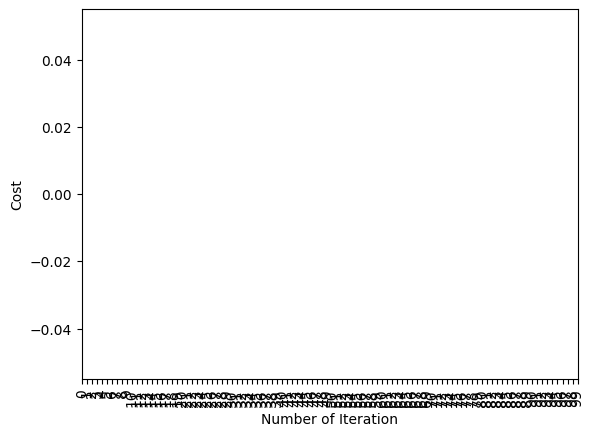

Test Accuracy =  63.66666666666667 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


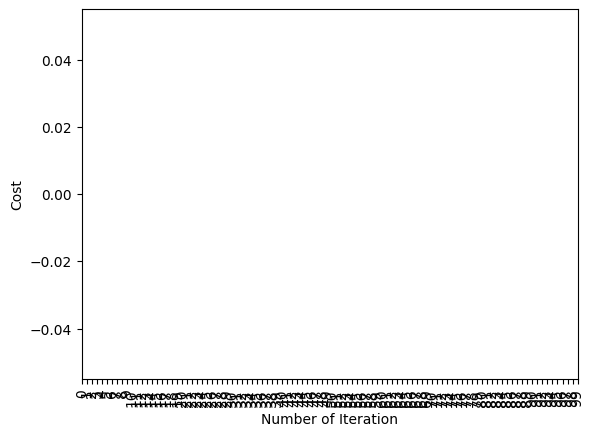

Test Accuracy =  67.33333333333333 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


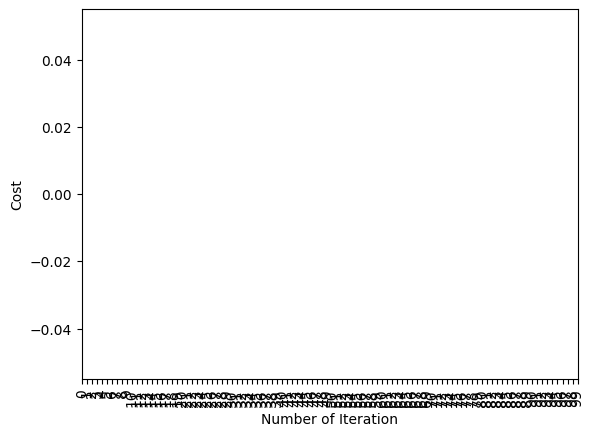

Test Accuracy =  70.33333333333334 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


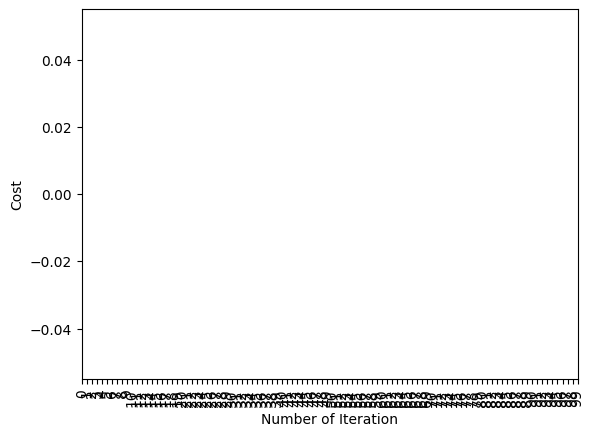

Test Accuracy =  70.66666666666667 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


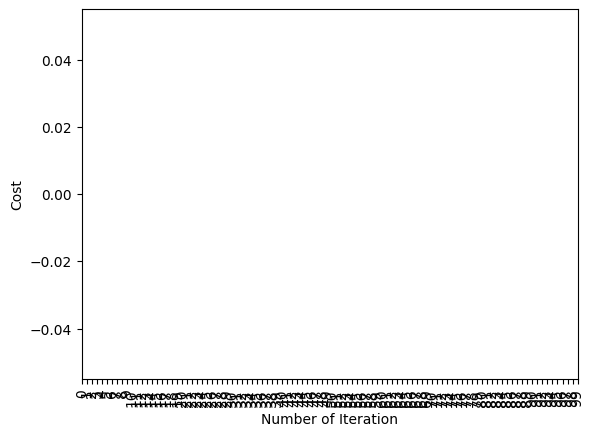

Test Accuracy =  61.66666666666667 %


In [12]:
k2 = 5
CV2 = KFold(n_splits=k2)
for train_index, valid_index in CV2.split(x_train):
    x_CV2_train, x_CV2_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
    y_CV2_train, y_CV2_valid = y_train[train_index], y_train[valid_index]
    logistic_regression(x_CV2_train, y_CV2_train, x_CV2_valid, y_CV2_valid,learning_rate = 0.001, num_iterations = 100)

63.66666666666667 %

67.33333333333333 %

70.33333333333334 %

70.66666666666667 %

61.66666666666667 %

Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf


<ipython-input-7-76da56fcdda1>:4: RuntimeWarning: divide by zero encountered in log
  loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
<ipython-input-6-0e2e218f5c28>:8: RuntimeWarning: overflow encountered in exp
  y_head = 1 / (1+np.exp(np.array(-z)))


Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


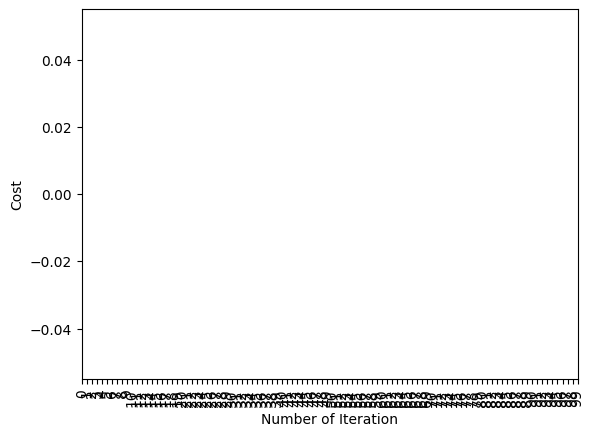

Test Accuracy =  66.0 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


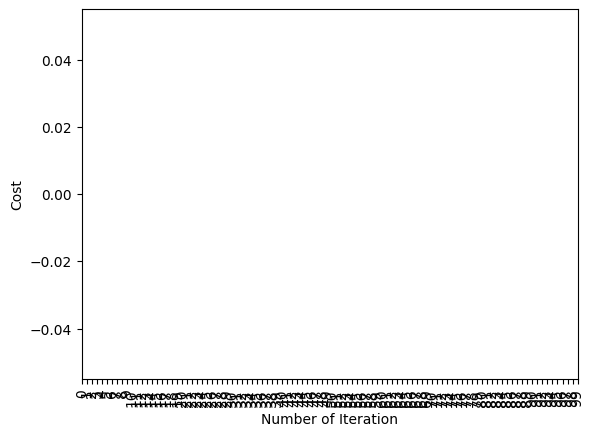

Test Accuracy =  60.66666666666667 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


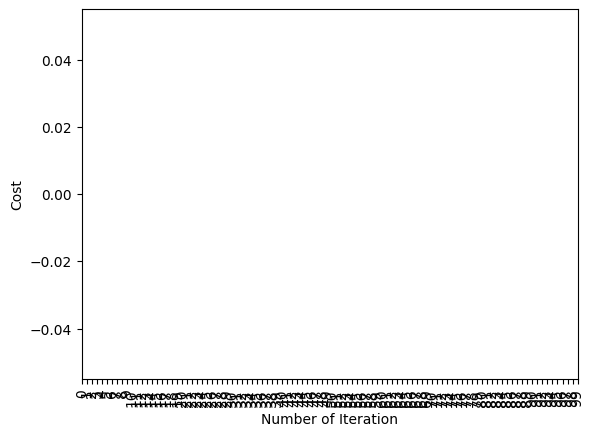

Test Accuracy =  66.0 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


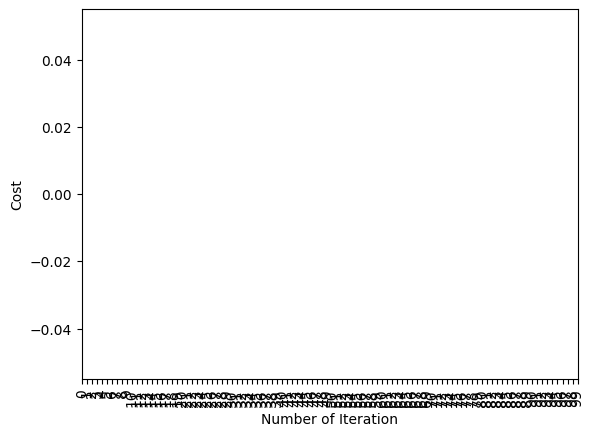

Test Accuracy =  68.66666666666667 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


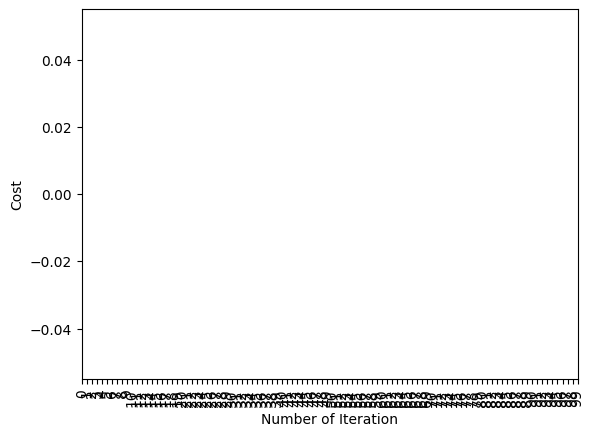

Test Accuracy =  72.66666666666667 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


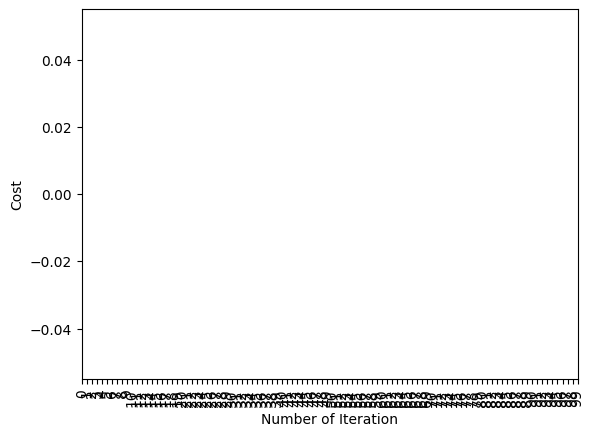

Test Accuracy =  67.33333333333333 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


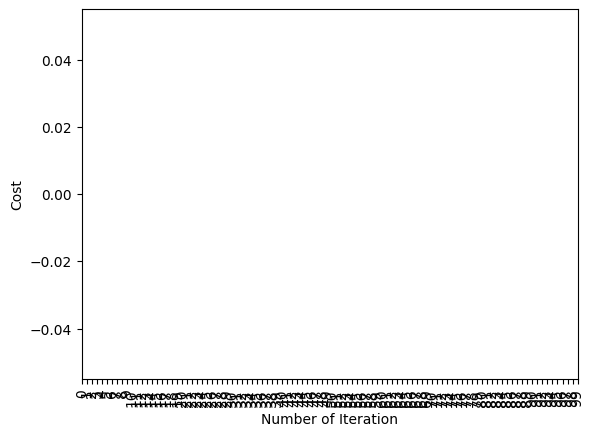

Test Accuracy =  73.33333333333333 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


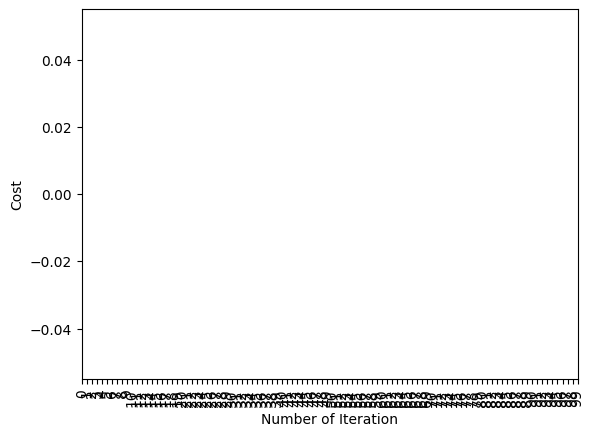

Test Accuracy =  67.33333333333333 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


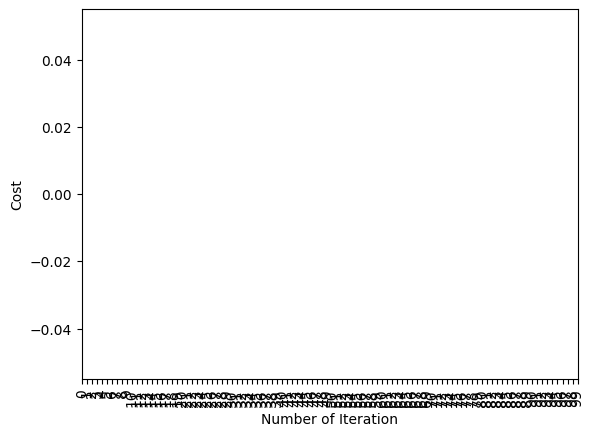

Test Accuracy =  56.00000000000001 %
Cost after iteration 0: inf
Cost after iteration 10: inf
Cost after iteration 20: inf
Cost after iteration 30: inf
Cost after iteration 40: inf
Cost after iteration 50: inf
Cost after iteration 60: inf
Cost after iteration 70: inf
Cost after iteration 80: inf
Cost after iteration 90: inf


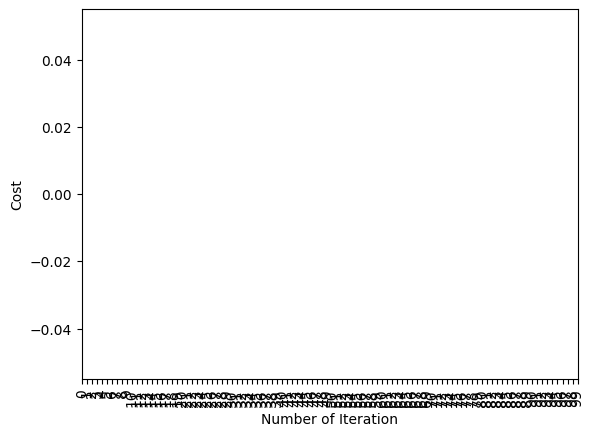

Test Accuracy =  66.0 %


In [13]:
k3 = 10
CV3 = KFold(n_splits=k3)
for train_index, valid_index in CV3.split(x_train):
    x_CV3_train, x_CV3_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
    y_CV3_train, y_CV3_valid = y_train[train_index], y_train[valid_index]
    logistic_regression(x_CV3_train, y_CV3_train, x_CV3_valid, y_CV3_valid,learning_rate = 0.001, num_iterations = 100)

66.0 %

60.66666666666667 %

66.0 %

68.66666666666667 %

72.66666666666667 %

67.33333333333333 %

73.33333333333333 %

67.33333333333333 %

56.00000000000001 %

66.0 %
